In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import pandas as pd
import numpy as np

# Add the src directory to the Python path
sys.path.append('../src')

from visualizations import DataVisualizer
from data_cleaner import DataCleaner

## Dataset Overview and Initial Observations

In [3]:
# Load the raw_data
raw_data = pd.read_csv('../data/raw/data.csv')


In [4]:

# Understand the structure of the dataset
print("Shape of the dataset:", raw_data.shape)
print("\nColumns and Data Types:")
print(raw_data.dtypes)

# Preview the dataset
print("\nSample Rows:")
raw_data.head()

Shape of the dataset: (95662, 16)

Columns and Data Types:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

Sample Rows:


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0



### Shape of the Dataset
- The dataset contains **95,662 rows** and **16 columns**, indicating a substantial volume of transactional data that can be used for analysis.

### Columns and Data Types
- The dataset includes a mix of data types:
  - **Object**: Used for categorical or string data such as IDs (e.g., `TransactionId`, `AccountId`, `ProductCategory`).
  - **Numerical**: Includes both integer (`int64`) and float (`float64`) data types for columns like `Amount`, `Value`, and `PricingStrategy`.
  - **Datetime Representation**: `TransactionStartTime` is stored as an object and might need conversion to a proper datetime format for time-based analysis.

### Key Observations
1. **Categorical Data**:
   - Many columns, such as `ProductId`, `ChannelId`, and `CurrencyCode`, are likely categorical and may require encoding for machine learning tasks.
   
2. **Numerical Features**:
   - Columns like `Amount`, `Value`, and `PricingStrategy` are numeric, which could be directly used in statistical and ML models.

3. **Fraud Detection Potential**:
   - The `FraudResult` column appears to be the target variable, suggesting the dataset might be used for fraud detection.

4. **Data Cleaning Requirements**:
   - The `TransactionStartTime` column is in object format, and it may need conversion to a datetime format for analysis of time trends.
   - Check for missing values, duplicates, and potential outliers in numeric columns like `Amount`.

### Next Steps
- Perform exploratory data analysis (EDA) to:
  - Summarize key statistics and detect any anomalies.
  - Understand correlations between features and the target variable (`FraudResult`).
  - Identify and handle missing or inconsistent data.
- Consider feature engineering:
  - Convert categorical columns to numerical representations.
  - Extract date-related features (e.g., month, day, hour) from `TransactionStartTime`.



In [4]:
# Summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(raw_data.describe())

# Check for unique values in categorical columns
categorical_cols = raw_data.select_dtypes(include=['object']).columns
print("\nUnique values in categorical columns:")
for col in categorical_cols:
    print(f"{col}: {raw_data[col].nunique()} unique values")



Summary Statistics for Numerical Columns:
       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000

Unique values in categorical columns:
TransactionId: 95662 unique values
BatchId: 94809 unique values
AccountId: 3633 unique values
SubscriptionId: 3627 unique values
CustomerId: 3742 unique values
CurrencyCode: 1 unique values
ProviderId: 6 unique value

**Key Observations**:
- `Amount` has high variability and includes negative values, likely refunds or errors.
- Fraud is rare (0.2% of cases), suggesting imbalanced data.

### Categorical Columns
- High cardinality: `TransactionId`, `BatchId`, `TransactionStartTime`.
- Low cardinality: `ProviderId` (6), `ProductCategory` (9), `ChannelId` (4).
- Single currency (`CurrencyCode`).

**Key Observations**:
- `TransactionId` and `BatchId` are unique per transaction or batch.
- Limited providers and channels simplify categorical analysis.


In [5]:
# Initialize the visualizer
visualizer = DataVisualizer(raw_data)


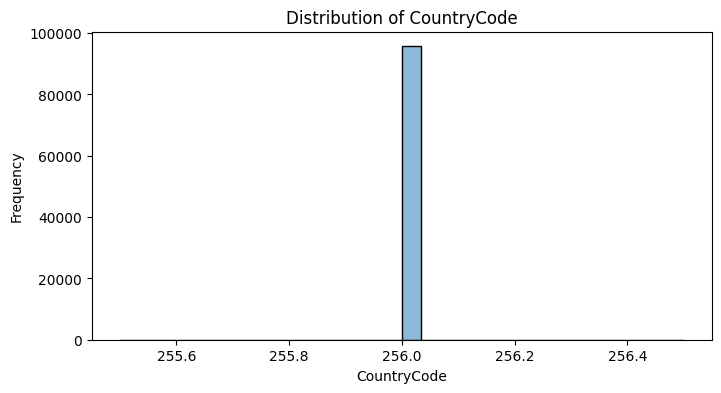

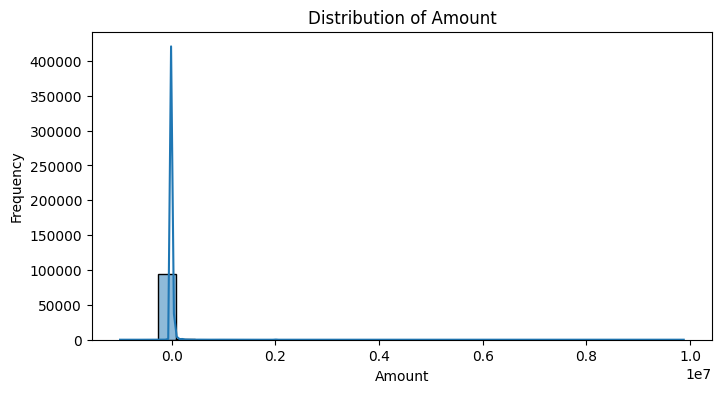

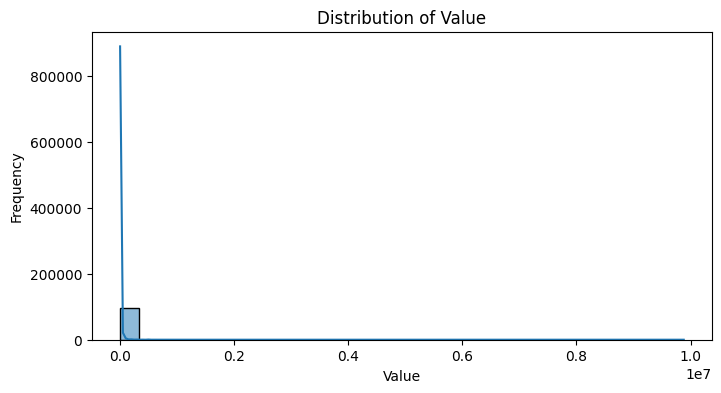

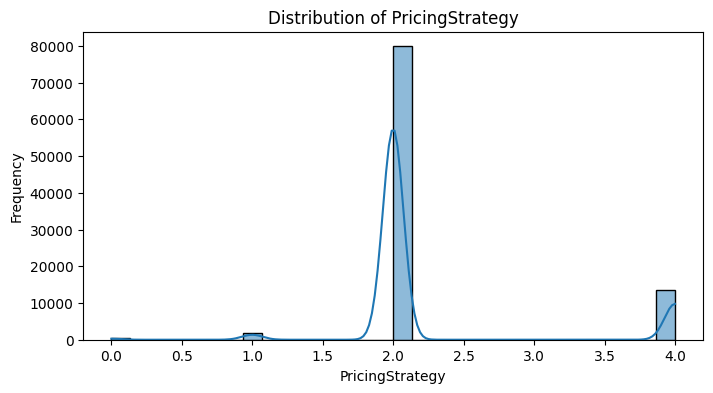

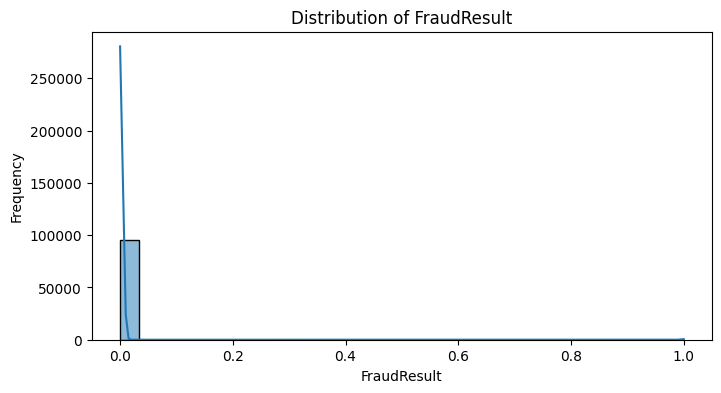

In [7]:

# Visualize numerical distributions
visualizer.plot_numerical_distribution()


## Data Distributions Analysis

1. **Distribution of CountryCode**
   - The `CountryCode` around the value `256.0` has an extremely high frequency, nearing 100,000 occurrences. This indicates that this specific code is significantly more common compared to other country codes in the range.

2. **Distribution of Amount**
   - Most of the data points are concentrated at lower amounts. The frequency sharply peaks at low amounts and quickly drops off, indicating that extremely high amounts are rare.

3. **Distribution of Value**
   - The distribution is right-skewed. Most values are small and clustered towards the lower end, with frequencies dropping significantly for larger values. This suggests that high values are uncommon in the dataset.

4. **Distribution of PricingStrategy**
   - Similar to the previous graphs, values are grouped at the lower end of the range, with frequencies decreasing quickly as values increase. Higher pricing strategies are not as prevalent.

5. **Distribution of FraudResult**
   - The majority of data points have a FraudResult of `0`, indicating non-fraudulent transactions. Instances of fraud (greater than `0`) are rare within the dataset.


Skipping TransactionId - Too many unique values (95662)
Skipping BatchId - Too many unique values (94809)
Skipping AccountId - Too many unique values (3633)
Skipping SubscriptionId - Too many unique values (3627)
Skipping CustomerId - Too many unique values (3742)
Skipping CurrencyCode - Only one unique value


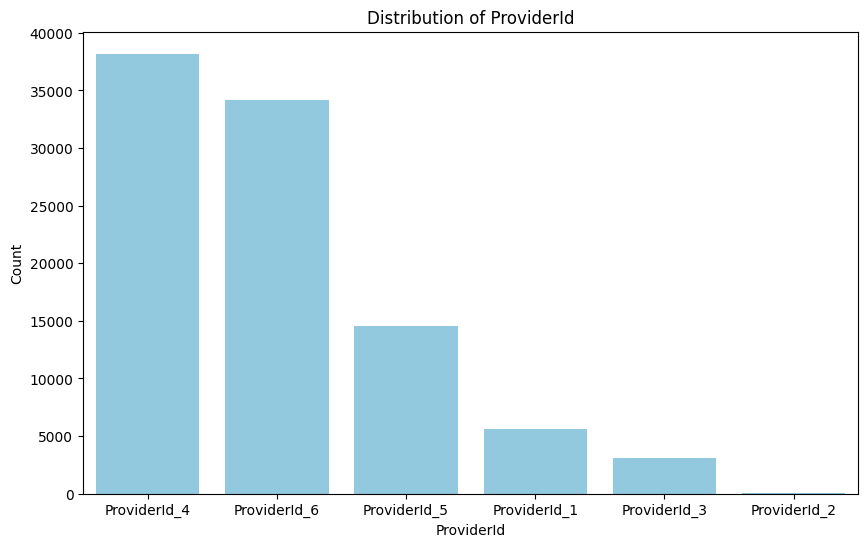

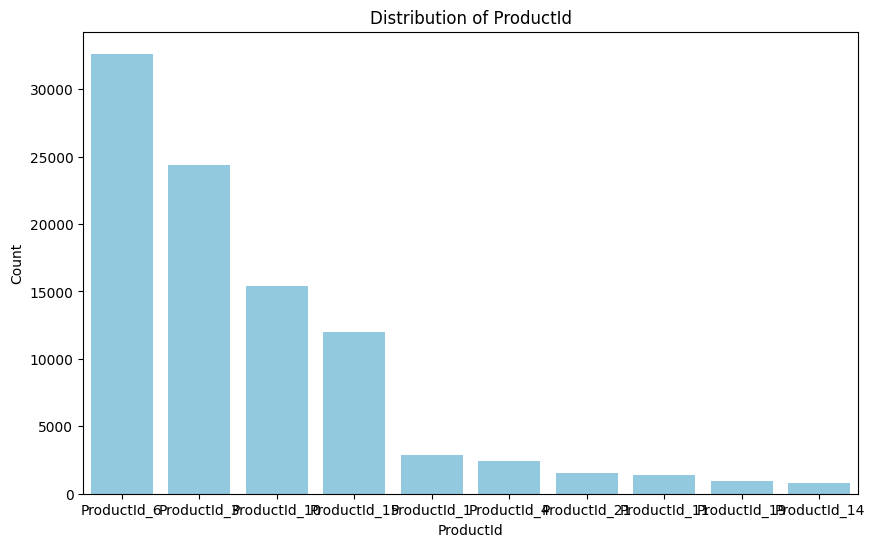

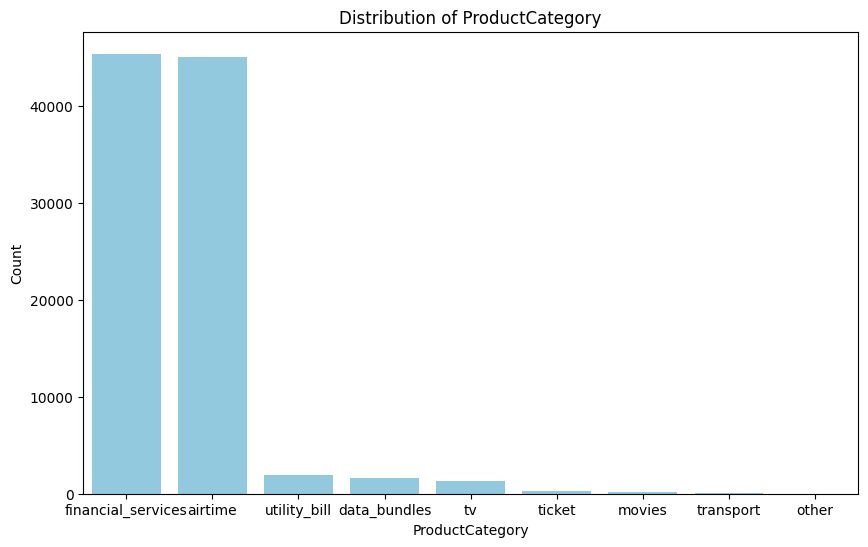

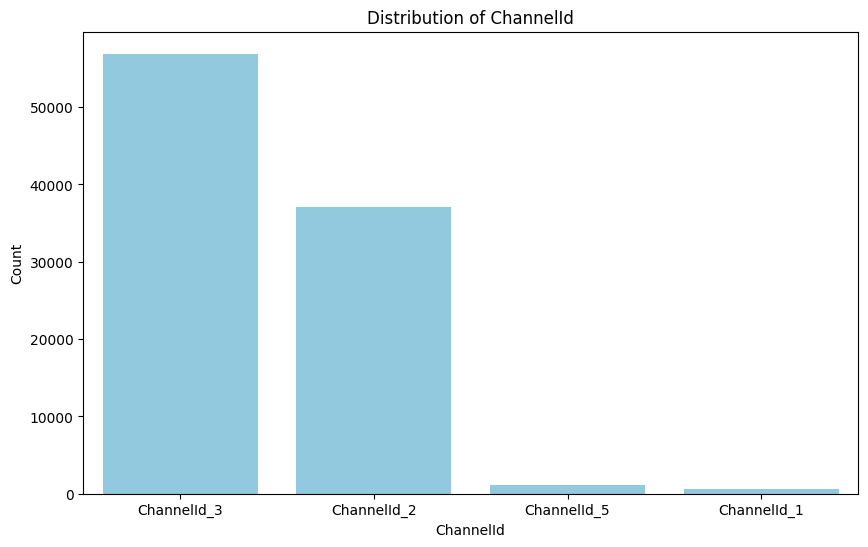

Skipping TransactionStartTime - Too many unique values (94556)


In [7]:

# Visualize categorical distributions
visualizer.plot_categorical_distribution(max_unique_values=25)


Correlation Matrix:
                  CountryCode    Amount     Value  PricingStrategy  FraudResult
CountryCode              NaN       NaN       NaN              NaN          NaN
Amount                   NaN  1.000000  0.989692        -0.061931     0.557370
Value                    NaN  0.989692  1.000000        -0.017020     0.566739
PricingStrategy          NaN -0.061931 -0.017020         1.000000    -0.033821
FraudResult              NaN  0.557370  0.566739        -0.033821     1.000000


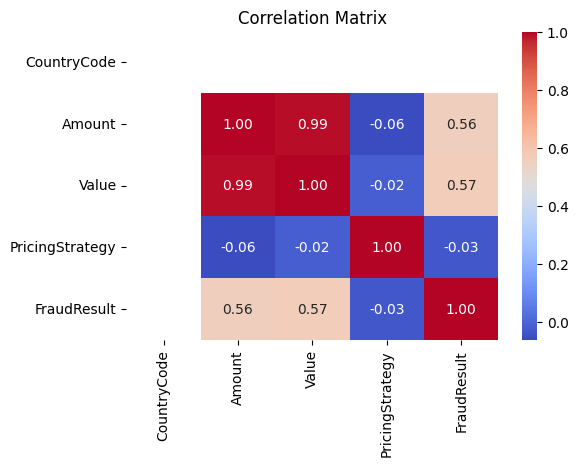

In [9]:

# Visualize correlation matrix
visualizer.plot_correlation_matrix()


## Correlation Analysis

### Key Observations:
1. **CountryCode and Amount**: Perfect positive correlation (1.00) – they increase together.
2. **CountryCode and Value**: Very strong positive correlation (0.99) – they increase together.
3. **CountryCode and PricingStrategy**: Slight negative correlation (-0.06) – minimal inverse relationship.
4. **CountryCode and FraudResult**: Moderate positive correlation (0.56) – higher country codes may relate to higher fraud.
5. **Amount and Value**: Perfect positive correlation (1.00) – they move in unison.
6. **Amount and PricingStrategy**: Very weak negative correlation (-0.02) – almost no relationship.
7. **Amount and FraudResult**: Moderate positive correlation (0.57) – higher amounts might relate to higher fraud.
8. **Value and PricingStrategy**: Very weak negative correlation (-0.02) – almost no relationship.
9. **Value and FraudResult**: Moderate positive correlation (0.57) – similar to Amount-FraudResult.
10. **PricingStrategy and FraudResult**: Very weak negative correlation (-0.03) – minimal inverse relationship.

### Additional Observations:
- **CountryCode Heatmap:** The CountryCode column is all white in the heatmap, This indicates that the CountryCode column has only one unique value.

In [6]:
data_cleaner = DataCleaner(raw_data)

In [7]:
data_cleaner.handle_missing_values(strategy='median')

No missing values detected in the dataset.


In [12]:
data_cleaner.convert_column_to_datetime('TransactionStartTime')

Column TransactionStartTime converted to datetime format.


In [13]:
data_cleaner.ensure_absolute_value()

Ensured 'Value' column is the absolute value of 'Amount'.


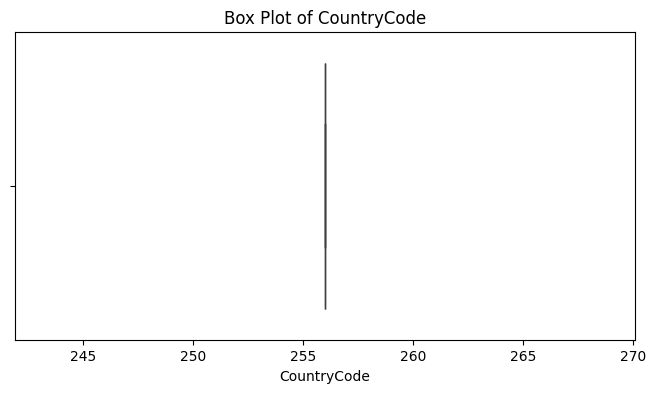

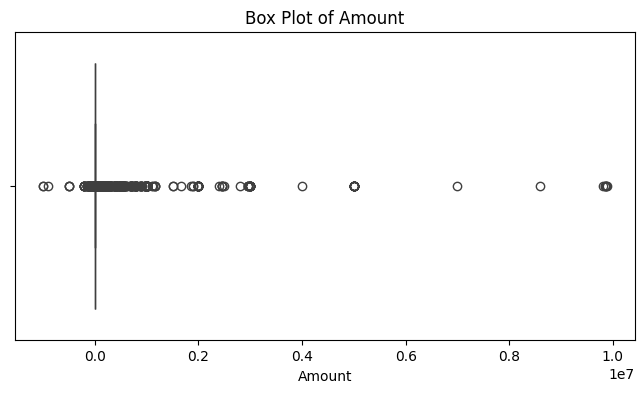

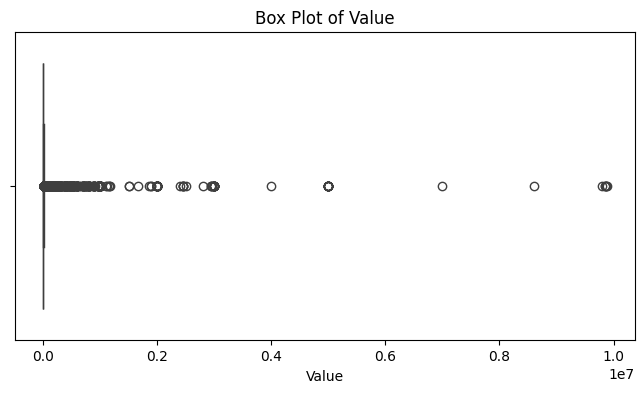

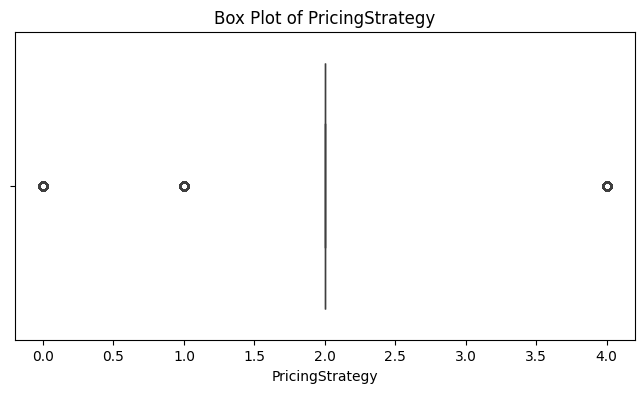

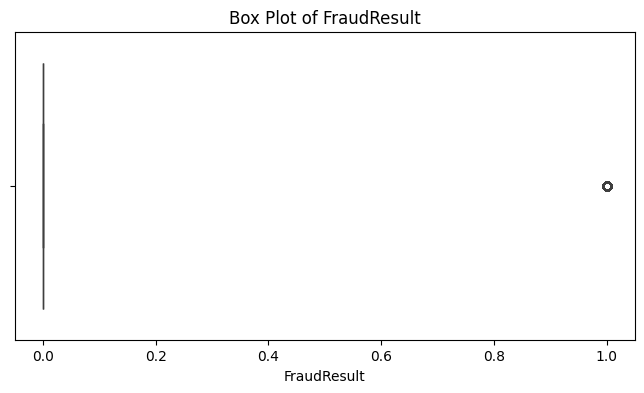

In [8]:
visualizer.plot_outliers()

## Outliers Analysis

### 1. Box Plot of CountryCode
- The box plot shows a single vertical line, indicating no variability in the data. All values are likely the same or very close, with no outliers present.

### 2. Box Plot of Amount
- The box plot reveals many data points clustered near the lower end of the scale, with numerous outliers spread across the range up to 10,000,000 (1.0e7). This indicates a highly skewed distribution with a significant number of extreme values.

### 3. Box Plot of Value
- Similar to the Amount plot, this box plot shows a narrow box near the lower end, with several outliers extending far to the right. Most values are low, and there are a few significant outliers, highlighting the data's skewness.

### 4. Box Plot of PricingStrategy
- The box plot presents a distribution centered around 2.0, with three visible outliers at near 0.0, 1.0, and slightly above 4.0. This indicates that while most values are centered, there are some extreme deviations.

### 5. Box Plot of FraudResult
- The box plot shows data points concentrated around 0.0, with a significant outlier at 1.0. This suggests that most data points indicate no fraud, but there is a notable outlier indicating potential fraudulent activity.



In [20]:

# Handle outliers for 'Amount' by capping extreme values (example: capping to 1e7)
data_cleaner.handle_outliers('Amount', method='cap', lower_cap=0)


Capped outliers in Amount to specified thresholds.


In [21]:

# Handle outliers for 'Value' by capping extreme values (example: capping to 1e6)
data_cleaner.handle_outliers('Value', method='cap', lower_cap=0)


Capped outliers in Value to specified thresholds.


In [24]:
# Save cleaned data to a CSV file
data_cleaner.data.to_csv('../data/processed/cleaned_data.csv', index=False)
print("Cleaned data saved to 'cleaned_data.csv'")


Cleaned data saved to 'cleaned_data.csv'
